In [13]:
!pip install quandl
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Getting Data From Quandl

In [14]:
TSF = quandl.get("FRED/DCOILBRENTEU",start_date="2000-05-01",end_date="2022-10-01")
TSF.head()

,Value
Date,
2000-05-02,24.73
2000-05-03,25.13
2000-05-04,25.06
2000-05-05,24.93
2000-05-08,26.03


# # Viewing the target Value fro better Understanding

<AxesSubplot:xlabel='Date'>

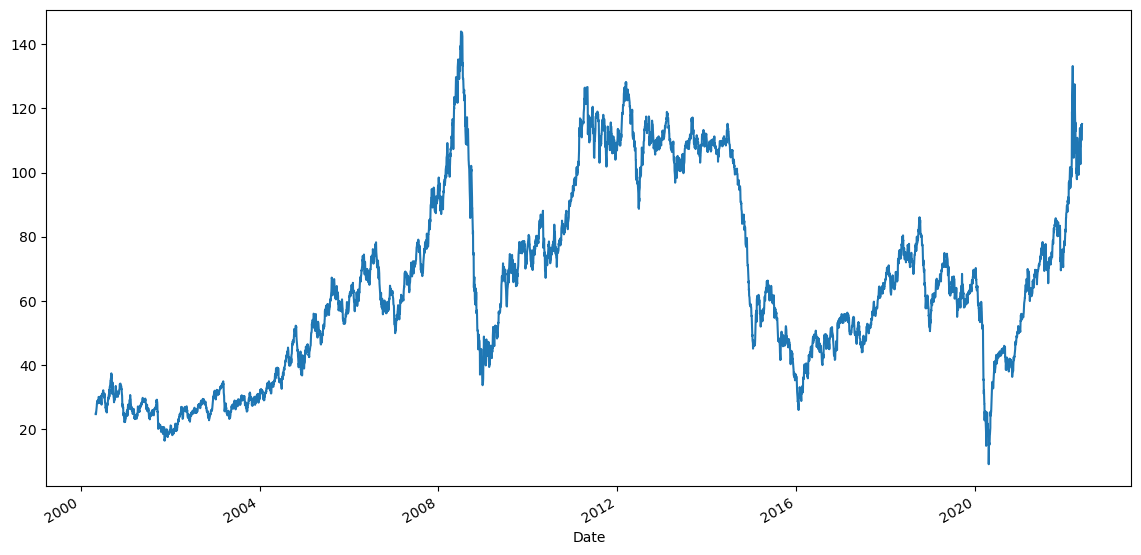

In [15]:
TSF.Value.plot(figsize=(14,7))

# # Using Rolling Window Average Method

In [16]:
# FInding the rolling window average
TSF["MA-5"] = TSF["Value"].shift(1).rolling(window = 5).mean()

TSF["MA-10"] = TSF["Value"].shift(1).rolling(window = 10).mean()

TSF.dropna(axis=0,inplace =True)
TSF.head(10)

,Value,MA-5,MA-10
Date,,,
2000-05-16,28.78,27.348,26.262
2000-05-17,28.40,27.766,26.667
2000-05-18,28.90,28.128,26.994
2000-05-19,29.01,28.464,27.378
2000-05-22,28.45,28.670,27.786
2000-05-23,28.12,28.708,28.028
2000-05-24,28.97,28.576,28.171
2000-05-25,29.62,28.690,28.409
2000-05-26,30.09,28.834,28.649


# # Splitting the data and trainning the linear Regression Model

In [17]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( TSF[["MA-5","MA-10"]] , TSF["Value"] ,test_size=0.3)

# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9948341182326499

In [18]:
# Prediction
y_pred = model.predict(x_test)
y_pred 

array([26.5990325 , 41.85679552, 31.28250909, ..., 43.10755754,
       99.62424875, 29.80167101])

# # Comparing Actual Vs Predicted Results

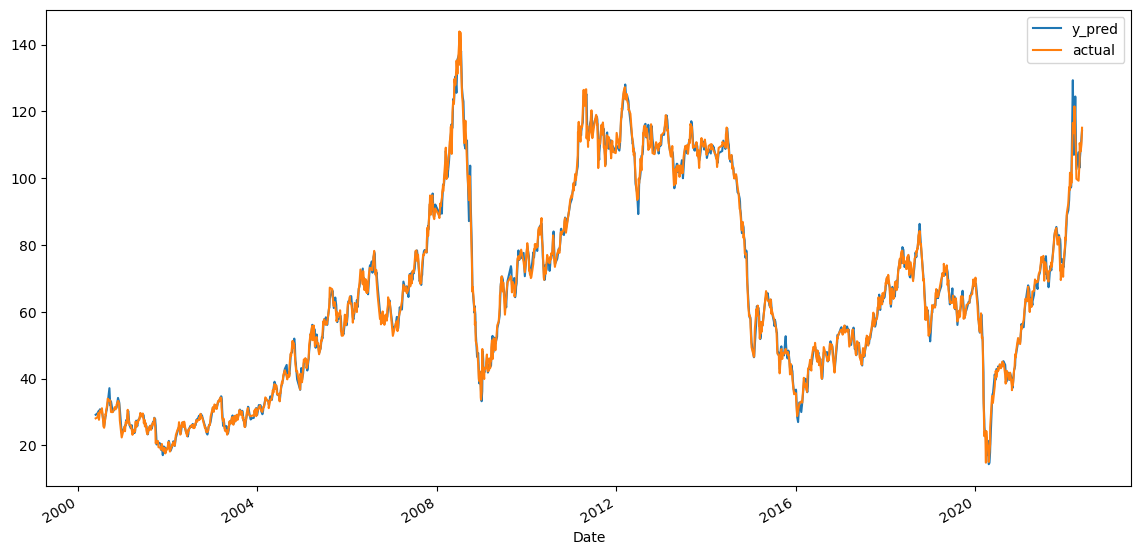

In [19]:
# Creating the new dataframe for prediction and comparing it with the test result
df1 = pd.DataFrame(y_pred,index=y_test.index,columns = ["price"])

df1.plot(figsize=(14,7))
y_test.plot()

plt.legend(["y_pred","actual"])
plt.show()